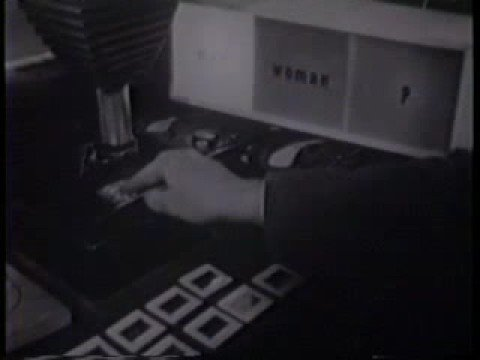

In [54]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

In [55]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [56]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

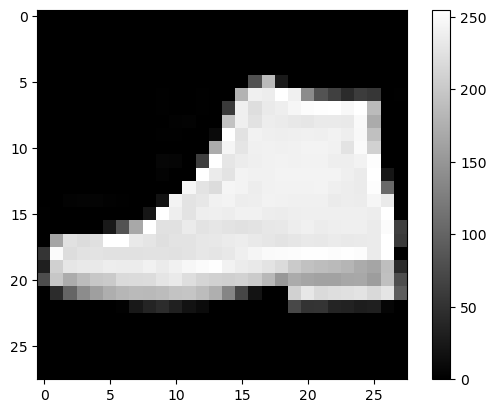

In [57]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [58]:
train_labels[data_idx]

9

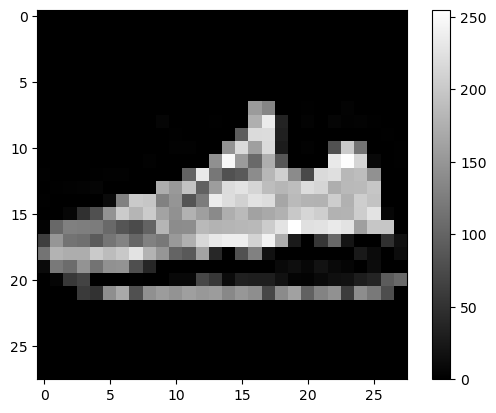

In [59]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
valid_labels[data_idx]

7

In [61]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [62]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [65]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

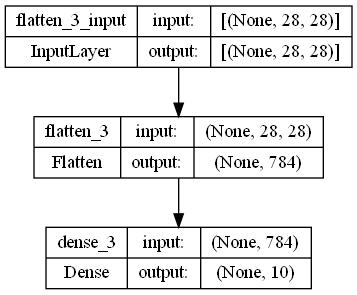

In [66]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 16.2378 - accuracy: 0.7450 - val_loss: 20.5431 - val_accuracy: 0.6914
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 11.9477 - accuracy: 0.7901 - val_loss: 11.5538 - val_accuracy: 0.7848
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 11.3210 - accuracy: 0.7942 - val_loss: 9.5639 - val_accuracy: 0.8081
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 10.7767 - accuracy: 0.8010 - val_loss: 12.1144 - val_accuracy: 0.7791
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 10.3546 - accuracy: 0.8017 - val_loss: 13.4660 - val_accuracy: 0.7861


In [69]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 206ms/step


array([[-3.60474243e+02, -5.45808228e+02, -2.52370117e+02,
        -5.59144958e+02, -2.84809296e+02,  3.19683319e+02,
        -2.13621353e+02,  3.06142853e+02,  1.53273560e+02,
         6.27559326e+02],
       [ 2.85063171e+02, -3.90309479e+02,  1.00636360e+02,
        -4.92282143e+01, -1.00246086e+02, -1.30054761e+03,
         6.40530319e+01, -1.91456580e+03, -1.28963120e+02,
        -1.18934216e+03],
       [ 1.03053406e+02,  4.65579491e+01,  8.40356445e+01,
         1.07612801e+02,  9.44099274e+01, -3.58471375e+02,
         7.74893570e+01, -6.07067139e+02, -2.23097057e+01,
        -3.24436646e+02],
       [ 1.50780624e+02, -3.50585794e+00,  1.48056976e+02,
         1.63792847e+02,  7.47374191e+01, -6.26469421e+02,
         1.24749924e+02, -9.78721802e+02, -1.03392563e+02,
        -8.02044861e+02],
       [ 1.42994644e+02,  1.43090393e+02,  4.24070015e+01,
         1.55121597e+02,  1.34942368e+02, -9.32492615e+02,
         2.68761196e+01, -9.00616272e+02,  7.35682535e+00,
        -1.

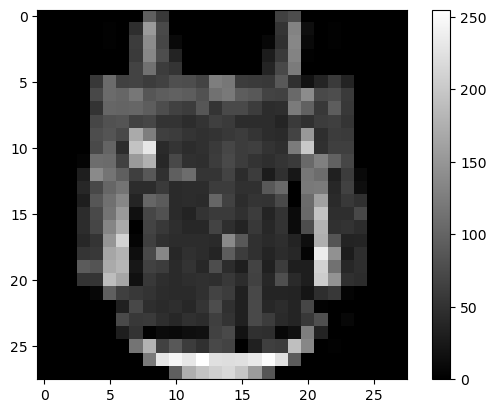

1/1 [==============================] - 0s 65ms/step


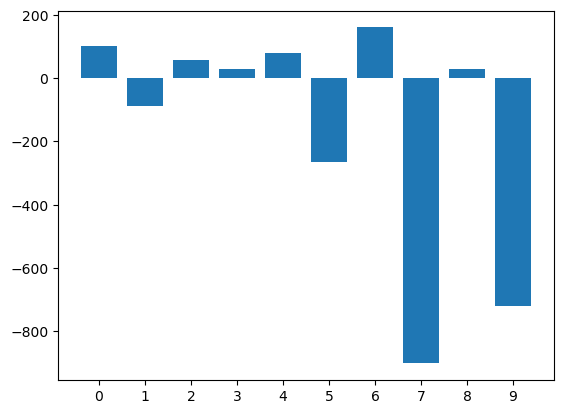

correct answer: 6


In [70]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])